## 	BLG521 - Python İle Veri Yapıları Ve Algoritma - Final Ödevi ##

#### **Program**: Büyük Veri Analitiği ve Yönetimi Tezsiz Yüksek Lisans
#### **Öğrenci Adı-Soyadı**: Asaf Ceyhun İNAN
#### **Öğrenci No**: 20231562007
#### **Öğrenci Email**: asafceyhuninan@gmail.com

#### SORU 1:

a) Binary Search Tree Çizimi

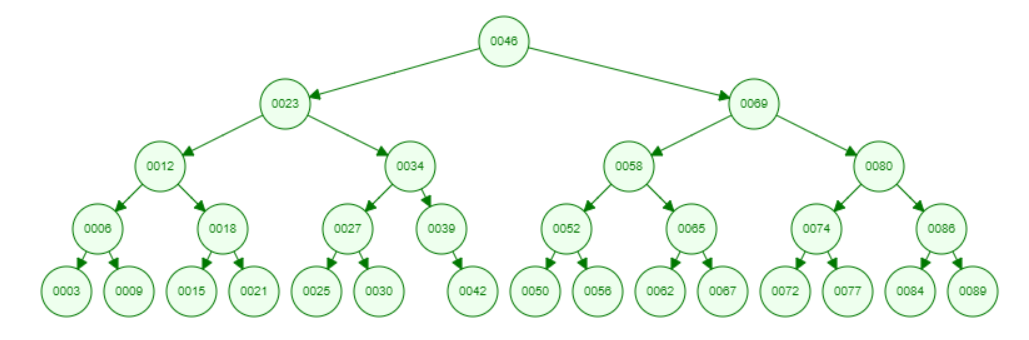

b) Python dilinde bir sınıf(class) oluşturulması ve bu sınıfa düğüm(node) eklenmesi için bir metot yazılması

In [78]:
class BST:
    def __init__(self, value):
        self.left = None
        self.right = None
        self.value = value
    # 23 için örnek düşünerek aşağıdaki kodu değerlendiriyorum. 23 değeri 'value'ya karşılık gelmektedir.
    def ekle(self,value):
        if value < self.value:
            if self.left is None:
                self.left = BST(value)
            else:
                self.left.ekle(value) #eğer solu doluysa bir alt kademeye geçmesi için ekle fonksiyonunu tekrar çağırıyoruz. 
        else:
            if self.right is None:
                self.right = BST(value) #tüm işlemleri right içinde benzer şekilde yapıyoruz.
            else:
                self.right.ekle(value)
    # yazdırmak için
    def inorder_traversal(self):
        if self.left:
            self.left.inorder_traversal()
        print(self.value)
        if self.right:
            self.right.inorder_traversal()

c) ekle metoduyla 30,40,50,60 gibi yeni düğümler eklemek 

In [79]:
#çizdiğimiz nodeları oluşturduğumuz metot ile eklemek istersek
# 46 değerini root olarak tanımlıyoruz.
bst = BST(46)
node_list = [30,40,50,60]
for node in node_list:
    bst.ekle(node)

bst.inorder_traversal()

30
40
46
50
60


#### SORU 2:

a) Komşuluk matrisini çıkarma

In [80]:
import numpy as np

# Düğüm isimlerini tanımlıyoruz
dugumler = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Kenarları tanımlıyoruz
kenarlar = [
    ('A', 'B'),
    ('A', 'C'),
    ('B', 'D'),
    ('B', 'G'),
    ('C', 'D'),
    ('C', 'E'),
    ('D', 'E'),
    ('D', 'F'),
    ('E', 'G'),
    ('F', 'G')
]

# Komşuluk matrisini 0'lar ile başlatıyoruz.
komsuluk_matrisi = np.zeros((len(dugumler), len(dugumler)), dtype=int)
print(komsuluk_matrisi)

# Komşuluk matrisini doldurma işlemi
for kenar in kenarlar:
    i = dugumler.index(kenar[0])
    j = dugumler.index(kenar[1])
    komsuluk_matrisi[i][j] = 1
    komsuluk_matrisi[j][i] = 1  # Grafik yönsüz olduğu için

print("Komşuluk Matrisi:")
print(komsuluk_matrisi)

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
Komşuluk Matrisi:
[[0 1 1 0 0 0 0]
 [1 0 0 1 0 0 1]
 [1 0 0 1 1 0 0]
 [0 1 1 0 1 1 0]
 [0 0 1 1 0 0 1]
 [0 0 0 1 0 0 1]
 [0 1 0 0 1 1 0]]


b) Komşuluk Listesini çıkarma

In [81]:
komsuluk_listesi = {dugum: [] for dugum in dugumler}
for kenar in kenarlar:
    komsuluk_listesi[kenar[0]].append(kenar[1])
    komsuluk_listesi[kenar[1]].append(kenar[0])  # Grafik yönsüz olduğu için

print("\nKomşuluk Listesi:")
for dugum in komsuluk_listesi:
    print(f"{dugum}: {komsuluk_listesi[dugum]}")


Komşuluk Listesi:
A: ['B', 'C']
B: ['A', 'D', 'G']
C: ['A', 'D', 'E']
D: ['B', 'C', 'E', 'F']
E: ['C', 'D', 'G']
F: ['D', 'G']
G: ['B', 'E', 'F']


#### SORU 3:

a) A düğümünden F düğümüne olan en kısa yolu bulacak Dijkstra'nın en kısa yol algoritmasının python dilinde yazılması

In [83]:
graf_matrisi = [
        # A  B  C  D  E  F
       [0, 4, 2, 0, 0, 0],  # A
       [4, 0, 5, 10, 0, 0], # B
       [2, 5, 0, 3, 4, 0],  # C
       [0, 10, 3, 0, 1, 11],# D
       [0, 0, 4, 1, 0, 5],  # E
       [0, 0, 0, 11, 5, 0], # F
]

def dijkstra(matrisi, baslangic):
    n = len(matrisi)
    mesafeler = [float('infinity')]*n
    mesafeler[baslangic] = 0
    oncelik_kuyrugu = [(0,baslangic)]
    onceki_dugumler = [None]*n
    
    while oncelik_kuyrugu:
        mevcut_mesafe, mevcut_dugum = heapq.heappop(oncelik_kuyrugu)
        if mevcut_mesafe > mesafeler[mevcut_dugum]:
            continue
        for komsu in range(n):
            if matrisi[mevcut_dugum][komsu] != 0:
                mesafe = mevcut_mesafe + matrisi[mevcut_dugum][komsu]
                if mesafe < mesafeler[komsu]:
                    mesafeler[komsu] = mesafe
                    onceki_dugumler[komsu] = mevcut_dugum
                    heapq.heappush(oncelik_kuyrugu, (mesafe, komsu))
    return mesafeler,onceki_dugumler # Her düğüme en kısa yolla ulaşırken bir önceki düğümü tutan liste.

def en_kisa_yolu_yazdir(onceki_dugumler, hedef):# hedef en kısa yolu bulmak istediğimiz nokta
    yol = [] # En kısa yolun düğüm numaralarını tutmak için boş bir liste oluşturuyoruz.
    while hedef is not None: # Bu döngü hedef düğümden başlayarak onceki_dugumler listesini kullanarak geriye doğru izler ve başlangıç düğümüne ulaşana kadar devam eder (hedef None olana kadar).
        yol.insert(0, hedef) # hedef düğümü yolun başına eklenir. Bu yolu tersinden izlediğimiz için gereklidir. insert(0, hedef) ifadesi her adımda düğümü listenin başına ekler. Böylece liste sonunda doğru sıralama ile oluşturulmuş olur.
        hedef = onceki_dugumler[hedef] #hedef düğümü, onceki_dugumler listesindeki bir önceki düğüme güncellenir
    return yol #Döngü tamamlandığında (hedef None olduğunda), en kısa yol tamamlanmış olur ve yol listesi döndürür

baslangic_dugumu = 0
hedef_dugumu = 5

mesafeler, onceki_dugumler = dijkstra(graf_matrisi, baslangic_dugumu)
print(mesafeler[hedef_dugumu])
yol = en_kisa_yolu_yazdir(onceki_dugumler, hedef_dugumu)
print(yol)

11
[0, 2, 4, 5]


# A'dan F'ye en kısa mesafe= 11
# En kısa yol = [A,C,E,F]

b) Grafı çizme

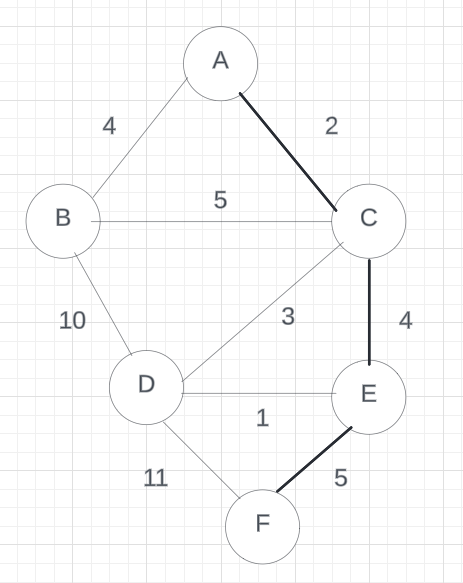